<a href="https://colab.research.google.com/github/anujeet98/heart-prediction-ml/blob/master/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install catboost

     |████████████████████████████████| 62.5MB 4.1MB/s 


In [0]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import train & test data 
train = pd.read_csv('train_values.csv')
test = pd.read_csv('test_values.csv')
data1=pd.read_csv('train_labels.csv')

In [0]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [0]:
data=pd.concat([train,data1],axis=1)

In [8]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


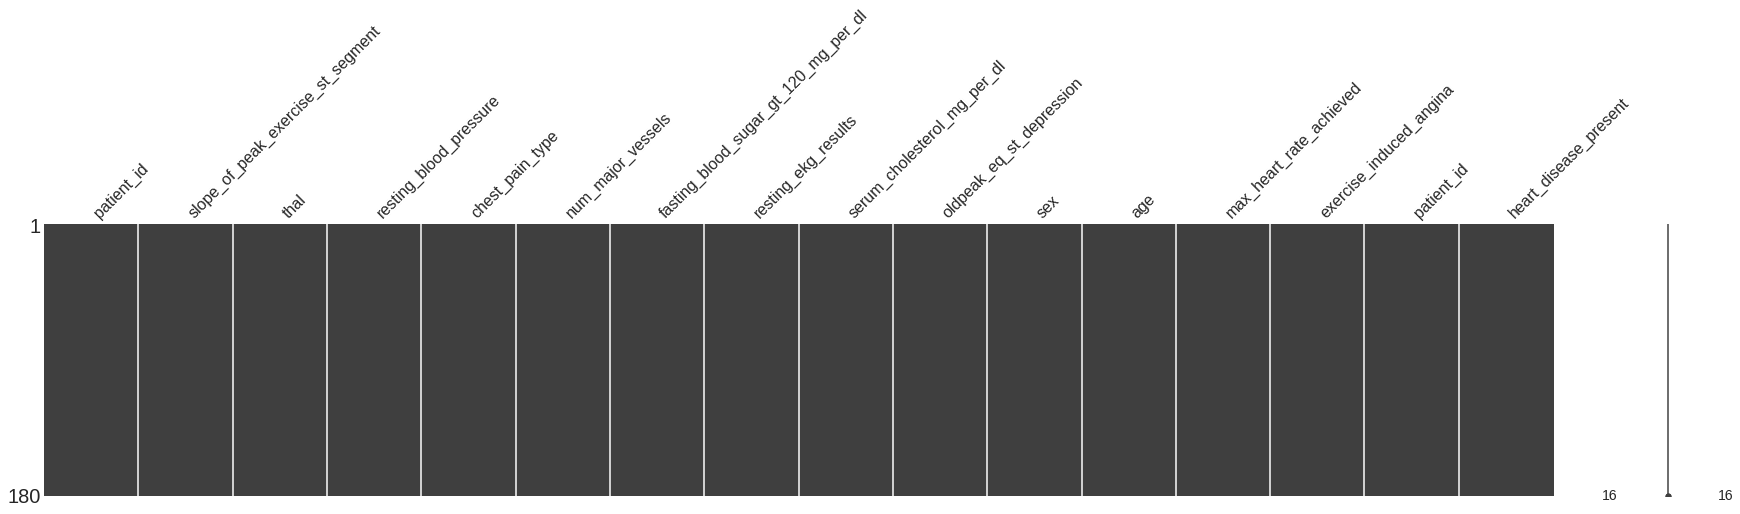

In [9]:
missingno.matrix(data, figsize = (30,5))

In [10]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
patient_id                              0
heart_disease_present                   0
dtype: int64

thal

In [11]:
data['heart_disease_present'].value_counts()
#count of patient categories

0    100
1     80
Name: heart_disease_present, dtype: int64

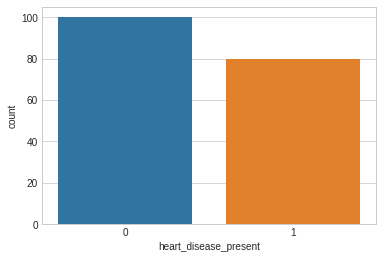

In [12]:
sns.countplot(x='heart_disease_present',data=data)

In [0]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [14]:
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
patient_id                               object
heart_disease_present                     int64
dtype: object

# Feature thal

In [15]:
data.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

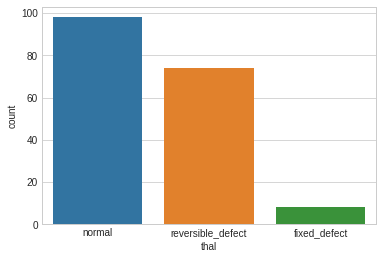

In [16]:
sns.countplot(x='thal', data=data)

In [0]:
df_bin['thal'] = data['thal']
df_con['thal'] = data['thal']

In [18]:
df_bin.head()

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect


# feature exercise_induced_angina

In [19]:
data.exercise_induced_angina.value_counts()

0    123
1     57
Name: exercise_induced_angina, dtype: int64

In [0]:
df_bin['exercise_induced_angina'] = data['exercise_induced_angina']
df_con['exercise_induced_angina'] = data['exercise_induced_angina']

In [21]:
df_bin.head(5)

,thal,exercise_induced_angina
0,normal,0
1,normal,0
2,normal,1
3,reversible_defect,0
4,reversible_defect,0


# Feature chest_pain_type

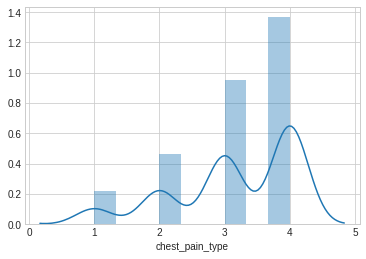

In [22]:
sns.distplot(data.chest_pain_type)

In [0]:
df_bin['chest_pain_type'] = data['chest_pain_type']
df_con['chest_pain_type'] = data['chest_pain_type']


In [24]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type
0,normal,0,2
1,normal,0,3
2,normal,1,4
3,reversible_defect,0,4
4,reversible_defect,0,1


# feature num_major_vessels 

In [25]:
data.num_major_vessels.value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

In [0]:
df_bin['num_major_vessels']=data['num_major_vessels']
df_con['num_major_vessels']=data['num_major_vessels']

In [27]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels
0,normal,0,2,0
1,normal,0,3,0
2,normal,1,4,3
3,reversible_defect,0,4,0
4,reversible_defect,0,1,0


# feature fasting_blood_sugar_gt_120_mg_per_dl

In [28]:
data.fasting_blood_sugar_gt_120_mg_per_dl.value_counts()

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

In [0]:
df_bin['fasting_blood_sugar_gt_120_mg_per_dl']=data['fasting_blood_sugar_gt_120_mg_per_dl']
df_con['fasting_blood_sugar_gt_120_mg_per_dl']=data['fasting_blood_sugar_gt_120_mg_per_dl']

In [30]:
df_bin.head(10)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl
0,normal,0,2,0,0
1,normal,0,3,0,0
2,normal,1,4,3,0
3,reversible_defect,0,4,0,0
4,reversible_defect,0,1,0,0
5,normal,0,3,0,0
6,reversible_defect,0,4,2,0
7,fixed_defect,1,4,1,0
8,reversible_defect,1,4,0,0
9,normal,0,3,0,0


# feature resting_ekg_results

In [31]:
data.resting_ekg_results.value_counts()


#1 has less value

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

In [0]:
df_bin['resting_ekg_results']=data['resting_ekg_results']
df_con['resting_ekg_results']=data['resting_ekg_results']

In [33]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results
0,normal,0,2,0,0,2
1,normal,0,3,0,0,0
2,normal,1,4,3,0,2
3,reversible_defect,0,4,0,0,0
4,reversible_defect,0,1,0,0,2


# feature heart_disease_present

In [34]:
data.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [0]:
df_bin['heart_disease_present']=data['heart_disease_present']
df_con['heart_disease_present']=data['heart_disease_present']

In [36]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present
0,normal,0,2,0,0,2,0
1,normal,0,3,0,0,0,0
2,normal,1,4,3,0,2,1
3,reversible_defect,0,4,0,0,0,1
4,reversible_defect,0,1,0,0,2,0


# feature sex

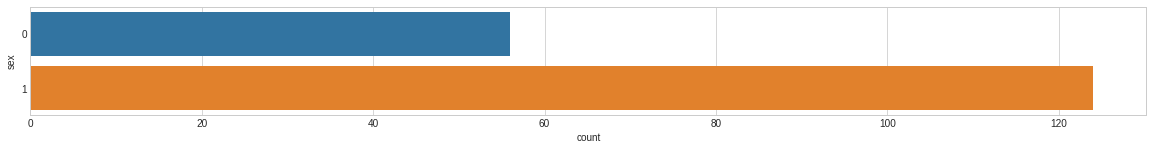

In [37]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 2))
sns.countplot(y="sex", data=data);

In [38]:
data.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

In [0]:
df_bin['sex']=data['sex']
df_con['sex']=data['sex']

In [40]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex
0,normal,0,2,0,0,2,0,1
1,normal,0,3,0,0,0,0,0
2,normal,1,4,3,0,2,1,1
3,reversible_defect,0,4,0,0,0,1,1
4,reversible_defect,0,1,0,0,2,0,1


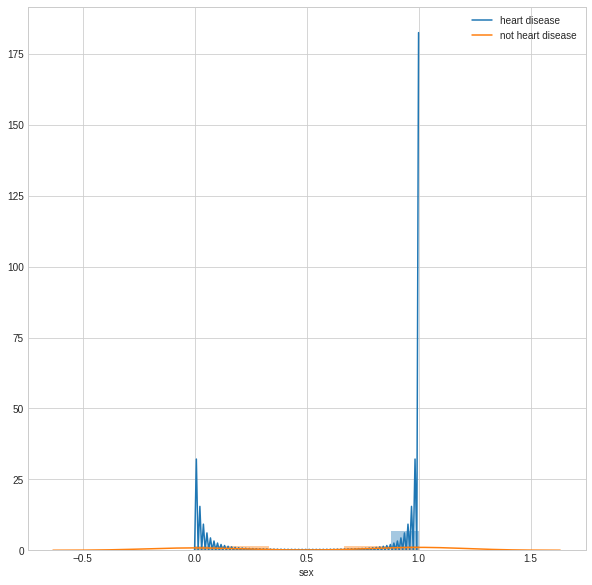

In [41]:
# How does the Sex variable look compared to heart_-present?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['heart_disease_present'] == 1]['sex'], kde_kws={'label': 'heart disease'});
sns.distplot(df_bin.loc[df_bin['heart_disease_present'] == 0]['sex'], kde_kws={'label': 'not heart disease'});

# data distribution

In [42]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# feature age

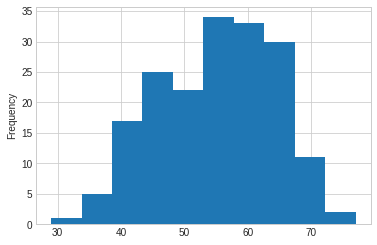

In [43]:
data.age.plot.hist()

In [0]:
df_con['age'] = data['age'] 
df_bin['age'] = pd.cut(data['age'], bins=5)

In [75]:
df_bin.age.value_counts()

(57.8, 67.4]      63
(48.2, 57.8]      56
(38.6, 48.2]      42
(67.4, 77.0]      13
(28.952, 38.6]     6
Name: age, dtype: int64

In [76]:
data[data["heart_disease_present"]==0][data["sex"]==0][data["thal"]=="normal"]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,1r508r,0
13,zlyac8,2,normal,138,4,0,0,2,236,0.2,0,45,152,1,zlyac8,0
16,qyrkxn,2,normal,130,2,0,0,2,234,0.6,0,45,175,0,qyrkxn,0
20,cvux3j,1,normal,160,2,2,0,0,302,0.4,0,71,162,0,cvux3j,0
22,jhdvtb,1,normal,106,4,2,0,0,223,0.3,0,67,142,0,jhdvtb,0
25,gla0im,2,normal,120,3,0,0,2,211,1.5,0,68,115,0,gla0im,0
26,zzmfh7,1,normal,128,4,1,0,2,303,0.0,0,57,159,0,zzmfh7,0
33,0n5fu0,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0n5fu0,0
37,tpuevg,1,normal,124,4,0,0,0,209,0.0,0,62,163,0,tpuevg,0


# feature resting_blood_pressure

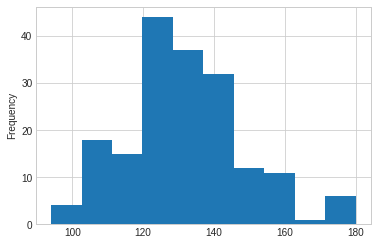

In [73]:
data.resting_blood_pressure.plot.hist()

In [80]:
  data['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142])

In [0]:
df_con['resting_blood_pressure'] = data['resting_blood_pressure'] 
df_bin['resting_blood_pressure'] = pd.cut(data['resting_blood_pressure'], bins=6)

In [88]:
df_bin.resting_blood_pressure.value_counts()

(122.667, 137.0]      59
(108.333, 122.667]    48
(137.0, 151.333]      42
(151.333, 165.667]    13
(93.914, 108.333]     11
(165.667, 180.0]       7
Name: resting_blood_pressure, dtype: int64

# feature serum_cholesterol_mg_per_dl

In [83]:
data['serum_cholesterol_mg_per_dl'].unique()

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219, 302, 226, 335,
       236, 231, 200, 234, 253, 204, 319, 233, 228, 245, 211, 303, 205,
       185, 175, 225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252,
       265, 417, 267, 261, 149, 281, 311, 315, 330, 256, 239, 295, 197,
       564, 305, 283, 160, 254, 282, 322, 250, 188, 220, 199, 215, 218,
       196, 266, 229, 259, 268, 177, 168, 262, 271, 299, 293, 141, 277,
       212, 321, 294, 313, 232, 289, 213, 274, 263, 244, 298, 172, 353,
       210, 192, 246, 286, 360, 174, 227, 248, 224, 300, 235, 217, 193,
       167, 216, 195, 309, 273, 198, 290, 275, 206, 164, 207, 249, 327,
       201])

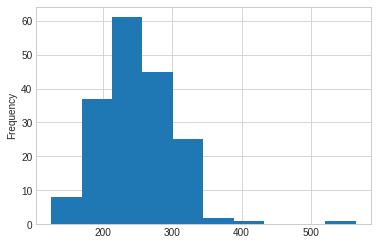

In [84]:
data.serum_cholesterol_mg_per_dl.plot.hist()

In [0]:
df_con['serum_cholesterol_mg_per_dl'] = data['serum_cholesterol_mg_per_dl'] 
df_bin['serum_cholesterol_mg_per_dl'] = pd.cut(data['serum_cholesterol_mg_per_dl'], bins=5)

In [99]:
df_bin.serum_cholesterol_mg_per_dl.value_counts()

(213.6, 301.2]      106
(125.562, 213.6]     45
(301.2, 388.8]       27
(476.4, 564.0]        1
(388.8, 476.4]        1
Name: serum_cholesterol_mg_per_dl, dtype: int64

# feature max_heart_rate_achieved

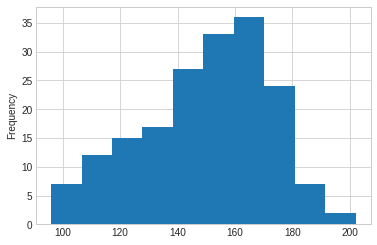

In [100]:
data.max_heart_rate_achieved.plot.hist()

In [0]:
df_con['max_heart_rate_achieved'] = data['max_heart_rate_achieved'] 
df_bin['max_heart_rate_achieved'] = pd.cut(data['max_heart_rate_achieved'], bins=5)

In [102]:
df_bin.max_heart_rate_achieved.value_counts()

(159.6, 180.8]     60
(138.4, 159.6]     60
(117.2, 138.4]     32
(95.894, 117.2]    19
(180.8, 202.0]      9
Name: max_heart_rate_achieved, dtype: int64

# feature oldpeak_eq_st_depression

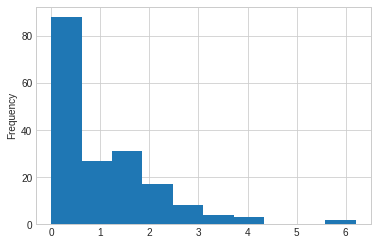

In [103]:
data.oldpeak_eq_st_depression.plot.hist()

In [0]:
df_con['oldpeak_eq_st_depression'] = data['oldpeak_eq_st_depression'] 
df_bin['oldpeak_eq_st_depression'] = pd.cut(data['oldpeak_eq_st_depression'], bins=8)

In [109]:
df_bin.oldpeak_eq_st_depression.value_counts()

(-0.0062, 0.775]    89
(0.775, 1.55]       41
(1.55, 2.325]       30
(2.325, 3.1]        12
(3.1, 3.875]         4
(5.425, 6.2]         2
(3.875, 4.65]        2
(4.65, 5.425]        0
Name: oldpeak_eq_st_depression, dtype: int64

In [110]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex,age,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,oldpeak_eq_st_depression
0,normal,0,2,0,0,2,0,1,"(38.6, 48.2]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.775]"
1,normal,0,3,0,0,0,0,0,"(48.2, 57.8]","(108.333, 122.667]","(213.6, 301.2]","(138.4, 159.6]","(1.55, 2.325]"
2,normal,1,4,3,0,2,1,1,"(67.4, 77.0]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.775]"
3,reversible_defect,0,4,0,0,0,1,1,"(38.6, 48.2]","(151.333, 165.667]","(213.6, 301.2]","(180.8, 202.0]","(-0.0062, 0.775]"
4,reversible_defect,0,1,0,0,2,0,1,"(57.8, 67.4]","(165.667, 180.0]","(213.6, 301.2]","(138.4, 159.6]","(3.875, 4.65]"


# feature encoding one hot

In [111]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,heart_disease_present_0,heart_disease_present_1,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.775]","oldpeak_eq_st_depression_(0.775, 1.55]","oldpeak_eq_st_depression_(1.55, 2.325]","oldpeak_eq_st_depression_(2.325, 3.1]","oldpeak_eq_st_depression_(3.1, 3.875]","oldpeak_eq_st_depression_(3.875, 4.65]","oldpeak_eq_st_depression_(4.65, 5.425]","oldpeak_eq_st_depression_(5.425, 6.2]"
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Start Building Machine Learning Models

In [0]:

# Seclect the dataframe we want to use first for predictions
selected_df = df_bin_enc

In [0]:
selected_df=selected_df.drop('heart_disease_present_1', axis=1)

In [0]:
selected_df=selected_df.drop('heart_disease_present_0', axis=1)

In [0]:
selected_df=pd.concat([selected_df,data1],axis=1)

In [121]:
selected_df.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.775]","oldpeak_eq_st_depression_(0.775, 1.55]","oldpeak_eq_st_depression_(1.55, 2.325]","oldpeak_eq_st_depression_(2.325, 3.1]","oldpeak_eq_st_depression_(3.1, 3.875]","oldpeak_eq_st_depression_(3.875, 4.65]","oldpeak_eq_st_depression_(4.65, 5.425]","oldpeak_eq_st_depression_(5.425, 6.2]",patient_id,heart_disease_present
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0z64un,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,ryoo3j,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,yt1s1x,1
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,l2xjde,1
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,oyt4ek,0


In [0]:

# Split the dataframe into data and labels
X_train = selected_df.drop('heart_disease_present', axis=1) # data
y_train = selected_df.heart_disease_present # labels

In [123]:
# Shape of the data (without labels)
X_train.shape

(180, 50)

In [124]:
X_train.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.775]","oldpeak_eq_st_depression_(0.775, 1.55]","oldpeak_eq_st_depression_(1.55, 2.325]","oldpeak_eq_st_depression_(2.325, 3.1]","oldpeak_eq_st_depression_(3.1, 3.875]","oldpeak_eq_st_depression_(3.875, 4.65]","oldpeak_eq_st_depression_(4.65, 5.425]","oldpeak_eq_st_depression_(5.425, 6.2]",patient_id
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0z64un
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,ryoo3j
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,yt1s1x
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,l2xjde
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,oyt4ek


In [125]:
y_train.shape

(180,)

# Define a function to fit machine learning algorithms

In [0]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# logistic reg

In [127]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

ValueError: ignored